## Giriş

Bu proje, Kaggle'dan alınan "Car Accidents in Brazil 2017-2023" veri setini kullanarak, Brezilya'da 2017-2023 yılları arasında meydana gelen trafik kazalarının detaylı analizini yapmak amacıyla hazırlanmıştır.

### Proje Amacı

Projenin temel amacı, bu dönem içinde gerçekleşen trafik kazalarına ilişkin belirli trendleri ve modelleri keşfetmek ve bu bilgilerin kazaların azaltılması ve daha güvenli yolların oluşturulması için nasıl kullanılabileceğini anlamaktır. Bu analizle şu sorulara yanıt aranmıştır:

- Hangi günlerde ve saatlerde daha fazla kaza meydana geliyor?
- Hangi yol türleri ve yönleri daha tehlikeli?
- Kaza sırasında yaralanmalar ve ölümler ne sıklıkla gerçekleşiyor?
- Hava koşulları kazalar üzerinde nasıl bir etki yaratıyor?

### Değişkenler

- inverse_data: Kazanın gerçekleştiği tarih bilgisi.
- week_day: Kazanın meydana geldiği haftanın günü.
- hour: Kazanın meydana geldiği saat bilgisi.
- victims_condition: Kazanın ne tür bi kaza olduğunu veren bilgi.
- weather_timestamp: Kazanın gerçekleştiği zaman dilimi ve ışık koşulları.
- road_direction: Yolun yönü.
- wheather_condition: Kazanın meydana geldiği sıradaki hava durumu.
- road_type: Şerit bilgisi.
- road_delineation: Kazanın meydana geldiği yolun türü.
- people: Kazaya karışan toplam insan sayısı.
- deaths: Kazada meydana gelen ölüm sayısı.
- slightly_injured: Hafif yaralanan kişi sayısı.
- severely_injured: Ağır yaralanan kişi sayısı.
- uninjured: Kazadan etkilenmeyen kişi sayısı.
- ignored: Görmezden gelinen durumlar veya yanlış raporlanmış veriler.
- total_injured: Toplam yaralı sayısı.
- vehicles_involved: Kazaya karışan araç sayısı.


Veri Seti : https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023


Github : https://github.com/emirhannozmen/Aygaz-Data-Analysis-Bootcamp

## **Veri Setinin Yüklenmesi**

In [1]:
import numpy as np
import pandas as pd
import os             
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-accidents-in-brazil-2017-2023/accidents_2017_to_2023_portugues.csv
/kaggle/input/car-accidents-in-brazil-2017-2023/accidents_2017_to_2023_english.csv


In [3]:
df = pd.read_csv('/kaggle/input/car-accidents-in-brazil-2017-2023/accidents_2017_to_2023_english.csv')

## **Rastgele Eksik Değerler Eklenmesi**

In [4]:
import random 

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.01)

Bu şekilde, df veri setine %1 oranında eksik değerler eklemiş oldum.

## **Keşifsel Veri Analizi**

In [5]:
# Veri setindeki ilk 5 satırı görelim.
df.head()

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4.0,0.0,2.0,0.0,4.0,2.0,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0.0,0.0,1.0,0.0,0.0,2.0,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1.0,1.0,2.0,0.0,2.0,2.0,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0.0,0.0,3.0,0.0,0.0,3.0,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,2.0,1.0,0.0,0.0,3.0,1.0,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [6]:
# Veri setindeki son 5 satırı görelim.
df.tail()

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
463147,2023-02-09,thursday,05:10:00,PR,116.0,"89,5",PIRAQUARA,Driver's lack of reaction,Collision with object,With injured victims,...,2.0,0.0,0.0,0.0,2.0,1.0,-25.454290,-49.08817,SPRF-PR,DEL01-PR
463148,2023-06-28,wednesday,19:48:00,ES,101.0,271,SERRA,Acessing the road without seeing the presence ...,Broadside collision,With injured victims,...,0.0,1.0,1.0,0.0,1.0,2.0,-20.232670,-40.27658,SPRF-ES,DEL02-ES
463149,2023-07-27,thursday,05:20:00,PI,343.0,478,ANGICAL DO PIAUI,Animals on the road,Animal collision,With injured victims,...,0.0,1.0,0.0,0.0,1.0,1.0,-6.152664,-42.71252,SPRF-PI,DEL01-PI
463150,2023-05-13,saturday,09:10:00,RJ,116.0,173,SAO JOAO DE MERITI,Pedestrian was walking in the road,Fall of vehicle occupant,With injured victims,...,2.0,0.0,1.0,0.0,2.0,3.0,-22.798100,-43.35727,SPRF-RJ,DEL01-RJ
463151,2023-08-20,sunday,07:50:00,RS,392.0,"96,8",MORRO REDONDO,Driver was sleeping,Run-off-road,With injured victims,...,0.0,1.0,0.0,0.0,1.0,1.0,-31.560370,-52.54775,SPRF-RS,DEL07-RS


In [7]:
# Satır, Sütun
df.shape

(463152, 27)

In [8]:
print(f"Veri setimizde toplam {len(df.columns)} kolon vardır ve bunlar sırasıyla: {', '.join(df.columns)}.")
# Kolonların veri tipini görelim:
print(f" Ve bu kolonların veri tipi: {type(df.columns)}\n")

Veri setimizde toplam 27 kolon vardır ve bunlar sırasıyla: inverse_data, week_day, hour, state, road_id, km, city, cause_of_accident, type_of_accident, victims_condition, weather_timestamp, road_direction, wheather_condition, road_type, road_delineation, people, deaths, slightly_injured, severely_injured, uninjured, ignored, total_injured, vehicles_involved, latitude, longitude, regional, police_station.
 Ve bu kolonların veri tipi: <class 'pandas.core.indexes.base.Index'>



In [9]:
# Bu kolonlardan bazılarını analize dahil etmeyeceğim için siliyorum.

columns_to_drop = ['state', 'road_id', 'km', 'city', 'cause_of_accident', 'type_of_accident', 'latitude', 'longitude', 'regional', 'police_station']
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Info ile kolonlarımızı tekrar gözden geçirelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        458612 non-null  object 
 1   week_day            458438 non-null  object 
 2   hour                458546 non-null  object 
 3   victims_condition   458579 non-null  object 
 4   weather_timestamp   458459 non-null  object 
 5   road_direction      458561 non-null  object 
 6   wheather_condition  458554 non-null  object 
 7   road_type           458492 non-null  object 
 8   road_delineation    458572 non-null  object 
 9   people              458397 non-null  float64
 10  deaths              458482 non-null  float64
 11  slightly_injured    458401 non-null  float64
 12  severely_injured    458666 non-null  float64
 13  uninjured           458573 non-null  float64
 14  ignored             458686 non-null  float64
 15  total_injured       458545 non-nul

Sadece değişkenleri ve tiplerini görmek için dtypes kullanıyorum.

In [11]:
df.dtypes

inverse_data           object
week_day               object
hour                   object
victims_condition      object
weather_timestamp      object
road_direction         object
wheather_condition     object
road_type              object
road_delineation       object
people                float64
deaths                float64
slightly_injured      float64
severely_injured      float64
uninjured             float64
ignored               float64
total_injured         float64
vehicles_involved     float64
dtype: object

Float veri tipindeki değerlerin istatiklerini görmek için describe kullanıyorum

In [12]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
people,458397.0,2.362238,1.923205,1.0,1.0,2.0,3.0,80.0
deaths,458482.0,0.079275,0.332286,0.0,0.0,0.0,0.0,21.0
slightly_injured,458401.0,0.835712,1.076481,0.0,0.0,1.0,1.0,61.0
severely_injured,458666.0,0.259448,0.602788,0.0,0.0,0.0,0.0,31.0
uninjured,458573.0,1.044290,1.504092,0.0,0.0,1.0,1.0,73.0
ignored,458686.0,0.144088,0.438408,0.0,0.0,0.0,0.0,54.0
total_injured,458545.0,1.095319,1.206981,0.0,0.0,1.0,1.0,66.0
vehicles_involved,458537.0,1.645839,0.731495,1.0,1.0,2.0,2.0,23.0


## **Eksik Veri Analizi**

In [13]:
df.isna().sum()

inverse_data          4540
week_day              4714
hour                  4606
victims_condition     4573
weather_timestamp     4693
road_direction        4591
wheather_condition    4598
road_type             4660
road_delineation      4580
people                4755
deaths                4670
slightly_injured      4751
severely_injured      4486
uninjured             4579
ignored               4466
total_injured         4607
vehicles_involved     4615
dtype: int64

In [14]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 7795100 adet eksik olmayan, 78484 eksik gözlem var.


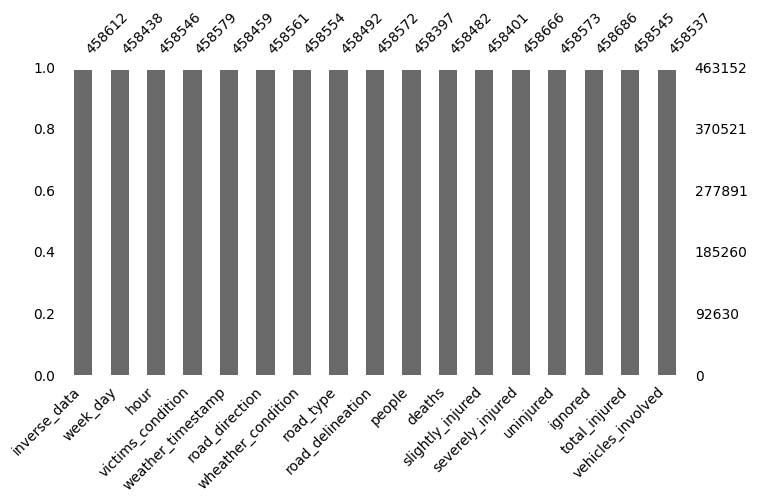

In [15]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

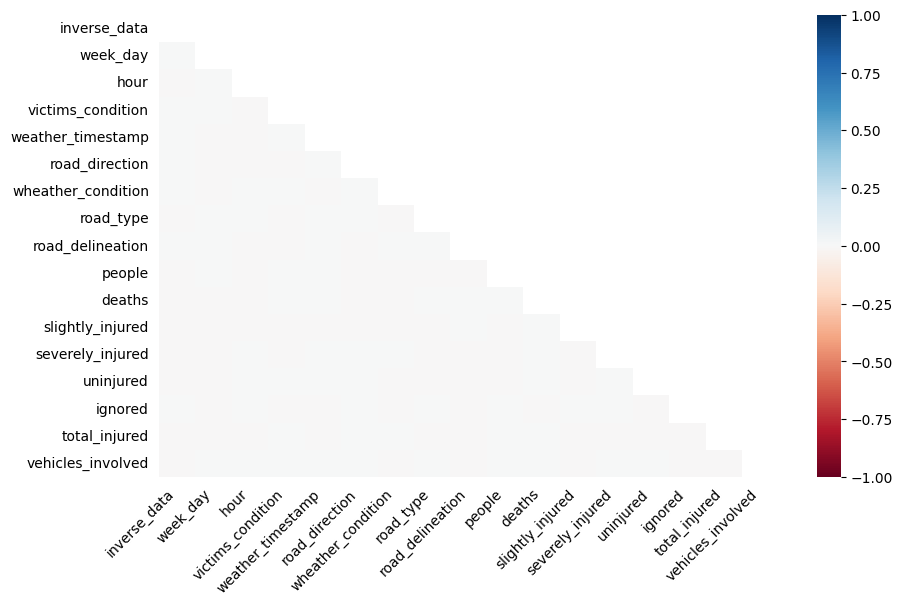

In [16]:
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

Veri analizi sürecinde manipülasyonu önlemek amacıyla aşağıdaki kolonlardaki eksik değerleri siliyorum: inverse_data, week_day, hour, road_direction, road_type.

In [17]:
# 0, 1, 2, 5, 7 numaralı kolonların eksik değerlerini siliyorum
eksik_deger_silinecek = ['inverse_data', 'week_day', 'hour', 'road_direction', 'road_type']
df = df.dropna(subset=eksik_deger_silinecek)

Diğer kolonları da mod ve ortalama ile dolduruyorum

In [18]:
mod_ile_doldurulacak_kolonlar = ['victims_condition', 'weather_timestamp', 'wheather_condition', 'road_delineation']

for col in mod_ile_doldurulacak_kolonlar:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [19]:
ortalama_ile_doldurulacak_kolonlar = ['people', 'deaths', 'slightly_injured', 'severely_injured', 'uninjured', 'ignored', 'total_injured', 'vehicles_involved']

for col in ortalama_ile_doldurulacak_kolonlar:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [20]:
# Veri setindeki toplam eksik değer sayısı
toplam_eksik_deger = df.isnull().sum().sum()
print(f"Toplam eksik değer sayısı: {toplam_eksik_deger}")

Toplam eksik değer sayısı: 0


## **Görselleştirme İşlemleri**

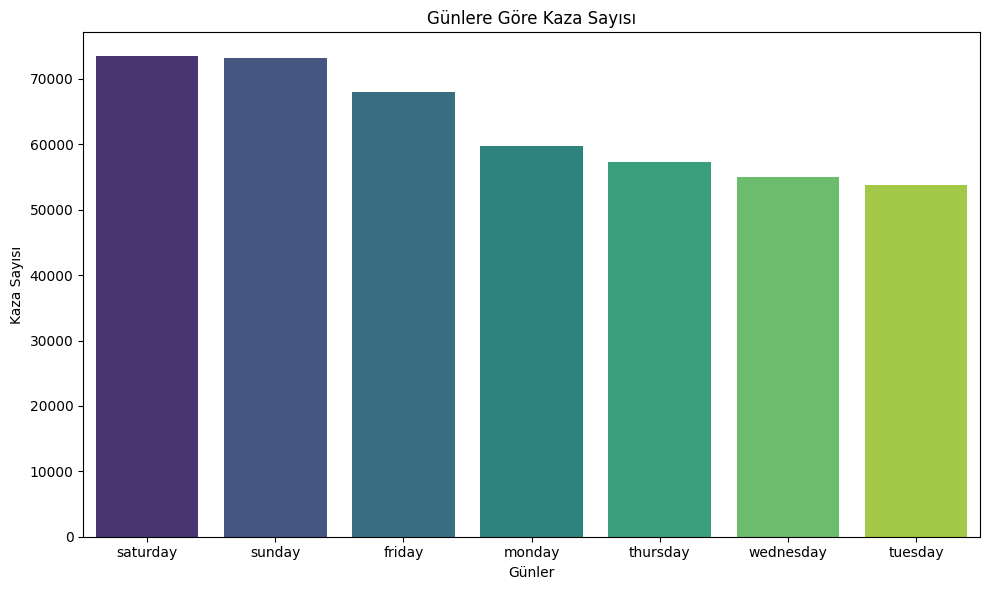

In [21]:
day_accidents = df.groupby('week_day').size().reset_index(name='accident_count').sort_values(by='accident_count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=day_accidents, x='week_day', y='accident_count', palette='viridis')
plt.title('Günlere Göre Kaza Sayısı')
plt.xlabel('Günler')
plt.ylabel('Kaza Sayısı')
plt.tight_layout()
plt.show()

Buradan anlaşıldığı üzere haftasonları daha çok kaza olduğu görülmektedir.

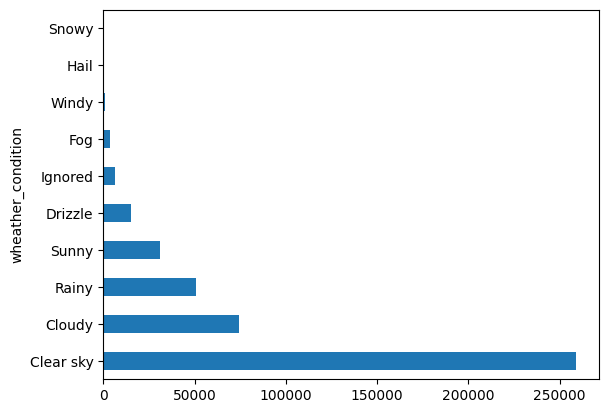

In [22]:
df['wheather_condition'].value_counts().plot.barh();

Kazaların çoğunluğu hava açıkken gerçekleşmiş.

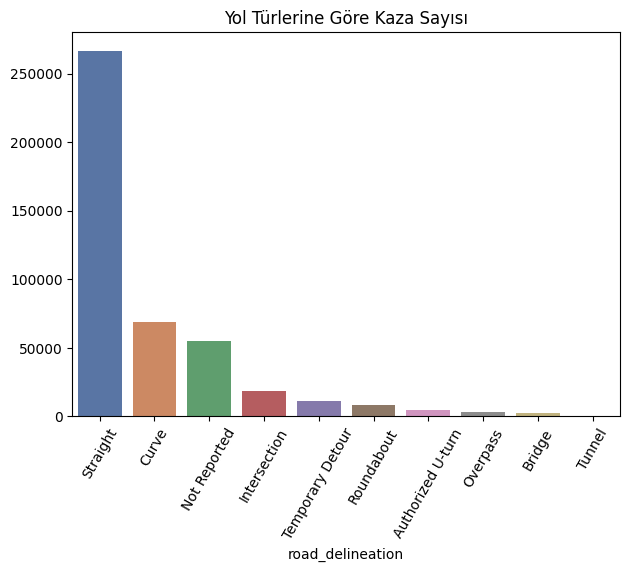

In [23]:
# Yol türlerine göre kaza sayısına bakalım.
road_type_counts = df['road_delineation'].value_counts()

sns.barplot(x=road_type_counts.index, y=road_type_counts.values, palette='deep')
plt.title("Yol Türlerine Göre Kaza Sayısı")
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

In [24]:
# Float tipindeki verileri int'e çevirdim.
columns_to_convert = ['people', 'deaths', 'slightly_injured', 'severely_injured', 'uninjured', 'ignored', 'total_injured', 'vehicles_involved']
df[columns_to_convert] = df[columns_to_convert].astype(int)

df[columns_to_convert].dtypes

people               int64
deaths               int64
slightly_injured     int64
severely_injured     int64
uninjured            int64
ignored              int64
total_injured        int64
vehicles_involved    int64
dtype: object

In [25]:
df_deaths = df.groupby(by = "people")["deaths"].mean().to_frame().reset_index().sort_values(by = "deaths", ascending = False)
df_deaths['deaths'] = df_deaths['deaths'].astype(int)

df_deaths_top5 = df_deaths.head(5).reset_index(drop=True)
df_deaths_top5

,people,deaths
0,80,13
1,77,8
2,54,4
3,65,3
4,43,2


Burada insan sayısıyla hayatını kaybedenlerin sayısının doğru orantılı olduğunu görmekteyiz.

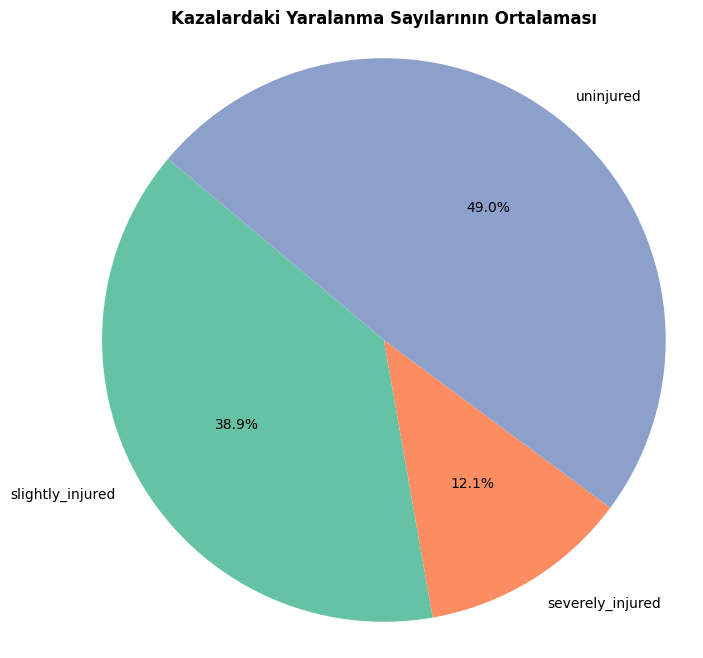

In [26]:
injury_columns = ['slightly_injured', 'severely_injured', 'uninjured']
avg_injuries = df[injury_columns].mean()

plt.figure(figsize=(8, 8))
plt.pie(avg_injuries, labels=avg_injuries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Kazalardaki Yaralanma Sayılarının Ortalaması", fontweight='bold')
plt.axis('equal')
plt.show()

## **Korelasyon Matrisi ve Feature Engineering**

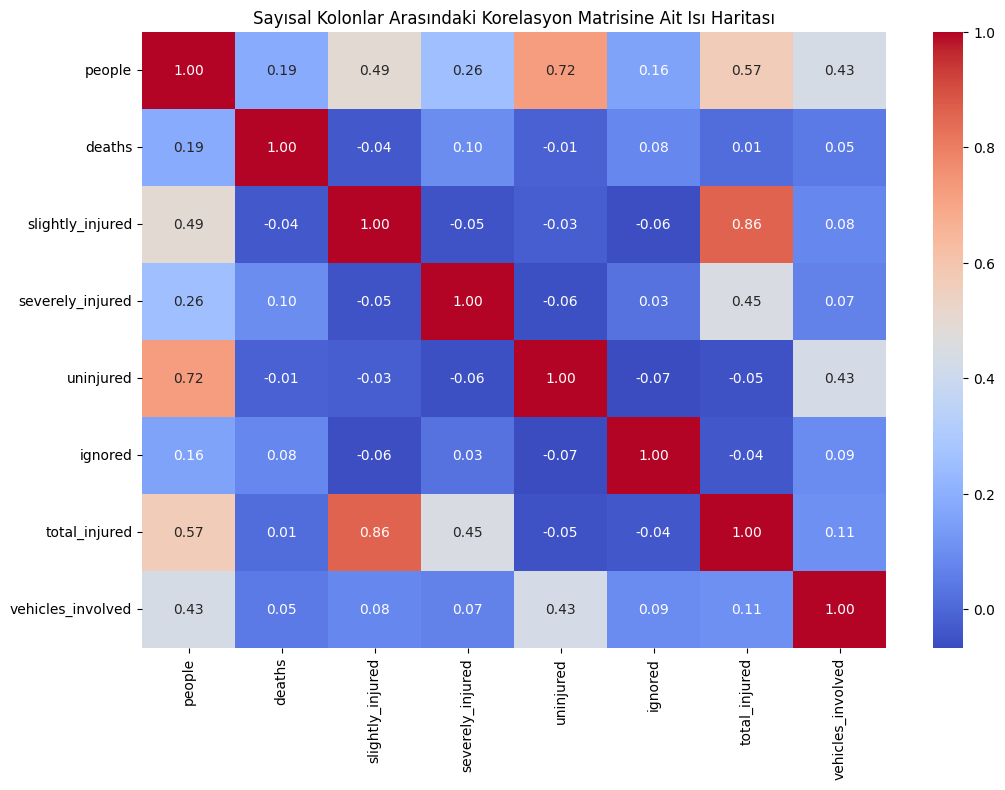

In [27]:
df_numerical = df.select_dtypes(include=['int'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Sayısal Kolonlar Arasındaki Korelasyon Matrisine Ait Isı Haritası')
plt.show()

slightly_injured ve total_injured gibi iki önemli değişken bulunmaktadır. Bu iki değişken arasındaki ilişkiyi daha iyi anlamak amacıyla bir yeni özellik oluşturulmuştur: 
Injury Rate.

slightly_injured: Kazada hafif şekilde yaralanan kişi sayısını ifade eder.
total_injured: Kazada toplamda yaralanan kişi sayısını ifade eder.
Bu iki değişken arasındaki oranı slightly_injured / total_injured şeklinde hesapladık. Bu oran, kazada yaralanan kişi sayısının ne kadarının hafif yaralı olduğunu gösterir. Yüksek bir oran, kazada hafif yaralanan kişilerin daha fazla olduğunu, düşük bir oran ise ağır yaralananların sayısının daha fazla olduğunu gösterir.

        injury_ratio
count  328454.000000
mean        0.754331
std         0.421041
min         0.000000
25%         0.500000
50%         1.000000
75%         1.000000
max        19.000000


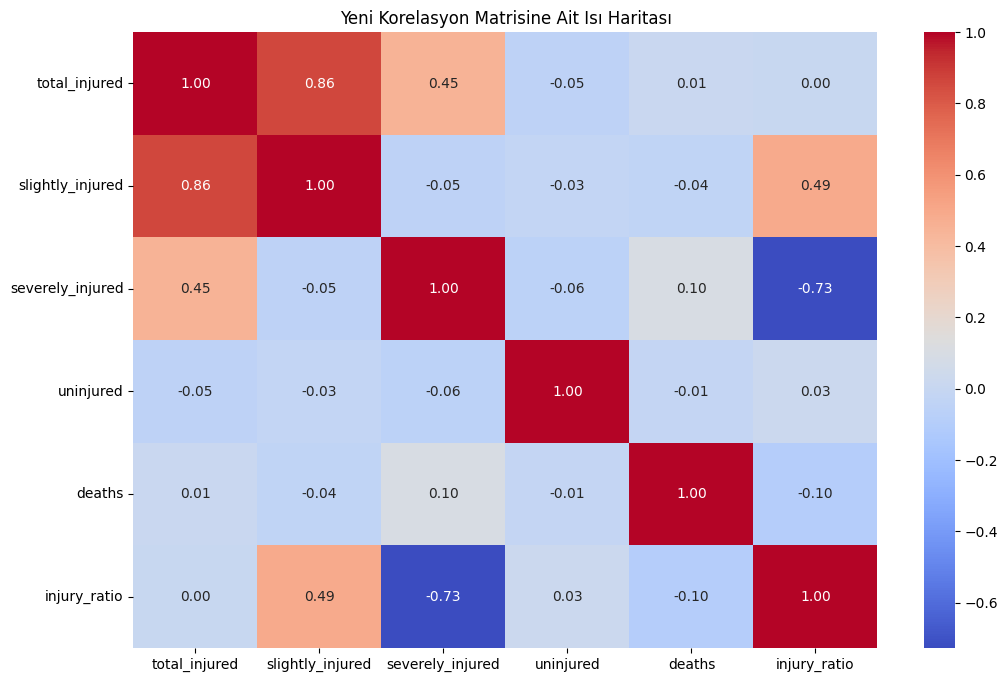

In [28]:
# Yeni bir özellik oluşturma
df['injury_ratio'] = df['slightly_injured'] / df['total_injured']

# Yeni oluşturduğumuz 'injury_ratio' kolonunun ortalama ve diğer istatistiksel ölçülerini inceleyelim
print(df[['injury_ratio']].describe())

# Korelasyon matrisini hesaplayalım
numerical_columns = ['total_injured', 'slightly_injured', 'severely_injured', 'uninjured', 'deaths', 'injury_ratio']
correlation_matrix = df[numerical_columns].corr()

# Korelasyon matrisinin ısı haritasını çizelim
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Yeni Korelasyon Matrisine Ait Isı Haritası")
plt.show()

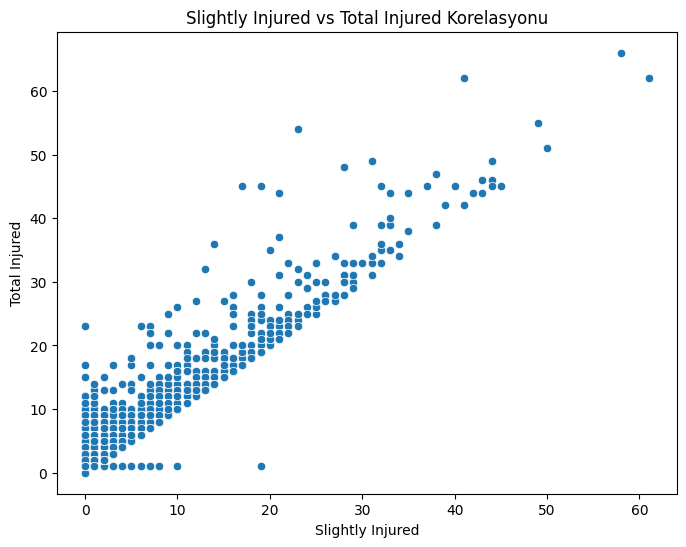

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='slightly_injured', y='total_injured')
plt.title("Slightly Injured vs Total Injured Korelasyonu")
plt.xlabel('Slightly Injured')
plt.ylabel('Total Injured')
plt.show()

## Sonuç

Bu çalışma, veri analizi sürecinde kullanılan yöntemleri ve elde edilen bulguları içermektedir. Veri seti üzerinden yapılan analizler, önemli çıkarımlar ve trendler sundu. Yapılan görselleştirmeler ve istatistiksel incelemeler, verilerin daha iyi anlaşılmasına yardımcı oldu.

Proje sürecinde kazandığım deneyimler, veri analizi alanında daha derinlemesine bilgi edinmeme yardımcı olmuştur. **Python, pandas, matplotlib ve seaborn** gibi araçları kullanarak gerçekleştirdiğim bu analizler, benim için çok öğretici olmuştur. Ayrıca, projede elde ettiğim veriler ve çıkarımlar, belirli alanlarda daha geniş kapsamlı araştırmalar yapma fırsatı sunmaktadır. İlerleyen süreçlerde daha kapsamlı veri setleri ile benzer analizler yapılabilir.